# NN 다중분류
- iris data에서 다중분류

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns

SEED = 42

import tensorflow as tf
import keras

In [2]:
!pip install --q ipython-autotime
%load_ext autotime

time: 464 µs (started: 2024-06-28 10:26:13 +00:00)


## 1. 데이터 준비

In [3]:
#!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv

time: 378 µs (started: 2024-06-28 10:26:13 +00:00)


In [4]:
iris = pd.read_csv('/content/iris.csv')
iris.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


time: 127 ms (started: 2024-06-28 10:26:13 +00:00)


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
time: 67.1 ms (started: 2024-06-28 10:26:14 +00:00)


In [6]:
iris.columns = [col.lower().replace(' ','_') for col in iris.columns]
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


time: 85.9 ms (started: 2024-06-28 10:26:14 +00:00)


In [7]:
df = iris.copy()
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


time: 101 ms (started: 2024-06-28 10:26:14 +00:00)


### 범주형 변수

In [8]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

time: 15.3 ms (started: 2024-06-28 10:26:14 +00:00)


### 연속형 변수

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


time: 251 ms (started: 2024-06-28 10:26:14 +00:00)


### 결측치 확인

In [10]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

time: 64.8 ms (started: 2024-06-28 10:26:14 +00:00)


### 중복치 확인

In [11]:
df.duplicated().sum() # 중복치 1개지만 그냥 진행

1

time: 38.5 ms (started: 2024-06-28 10:26:14 +00:00)


## 학습데이터, 테스트 데이터 분리

In [12]:
df = df.sample(frac=1, random_state=SEED)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor


time: 70 ms (started: 2024-06-28 10:26:14 +00:00)


In [13]:
df.shape

(150, 5)

time: 6.59 ms (started: 2024-06-28 10:26:15 +00:00)


In [14]:
idx_train = int(len(df) * 0.8)
idx_train

120

time: 6.94 ms (started: 2024-06-28 10:26:15 +00:00)


In [15]:
train = df.iloc[:idx_train,:]
test = df.iloc[idx_train:,:]
print(train.shape,test.shape)

(120, 5) (30, 5)
time: 17.8 ms (started: 2024-06-28 10:26:15 +00:00)


In [16]:
train['species'].value_counts()

species
setosa        43
versicolor    39
virginica     38
Name: count, dtype: int64

time: 29.8 ms (started: 2024-06-28 10:26:15 +00:00)


### X, y 나누기

In [17]:
X_train = train.drop(['species'], axis=1)
y_train = train['species']
X_test = test.drop(['species'], axis=1)
y_test = test['species']

time: 10.7 ms (started: 2024-06-28 10:26:15 +00:00)


In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)
time: 14.2 ms (started: 2024-06-28 10:26:15 +00:00)


## 스케일링

In [19]:
X_train.head(5)

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


time: 112 ms (started: 2024-06-28 10:26:15 +00:00)


In [20]:
u = X_train.mean()
std = X_train.std()

time: 15.5 ms (started: 2024-06-28 10:26:15 +00:00)


In [21]:
X_train_s = (X_train - u) / std
X_train_s.head(5)

,sepal_length,sepal_width,petal_length,petal_width
73,0.357039,-0.619201,0.577532,0.035389
18,-0.124362,1.639282,-1.103240,-1.122788
118,2.282642,-1.070898,1.810098,1.450937
78,0.236689,-0.393353,0.465480,0.421447
76,1.199490,-0.619201,0.633558,0.292761


time: 175 ms (started: 2024-06-28 10:26:15 +00:00)


In [22]:
X_test_s = (X_test - u) / std
X_test_s.head(5)

,sepal_length,sepal_width,petal_length,petal_width
91,0.357039,-0.167504,0.521506,0.292761
41,-1.568564,-1.748443,-1.327343,-1.122788
58,0.958790,-0.393353,0.521506,0.164075
90,-0.365062,-1.070898,0.409455,0.035389
48,-0.605763,1.413434,-1.215291,-1.251474


time: 223 ms (started: 2024-06-28 10:26:15 +00:00)


## 인코딩

In [23]:
y_train.value_counts()

species
setosa        43
versicolor    39
virginica     38
Name: count, dtype: int64

time: 25.3 ms (started: 2024-06-28 10:26:16 +00:00)


In [24]:
label_dict = {'setosa':0, 'versicolor':1, 'virginica':2}

time: 590 µs (started: 2024-06-28 10:26:16 +00:00)


In [25]:
y_train_e = y_train.map(label_dict)
y_train_e.head(5)

73     1
18     0
118    2
78     1
76     1
Name: species, dtype: int64

time: 19.5 ms (started: 2024-06-28 10:26:16 +00:00)


In [26]:
y_test_e = y_test.map(label_dict)

time: 2.04 ms (started: 2024-06-28 10:26:16 +00:00)


In [27]:
X_train_s = X_train_s.to_numpy()
y_train_e = y_train_e.to_numpy()
X_test_s = X_test_s.to_numpy()
y_test_e = y_test_e.to_numpy()
print(type(X_train_s), type(y_train_e))
print(type(X_test_s), type(y_test_e))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 1.3 ms (started: 2024-06-28 10:26:16 +00:00)


## 모델 학습

In [28]:
X_train_s.shape, y_train_e.shape

((120, 4), (120,))

time: 5.03 ms (started: 2024-06-28 10:26:16 +00:00)


In [29]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train_e)
y_test_o = to_categorical(y_test_e)

time: 1.49 ms (started: 2024-06-28 10:26:16 +00:00)


In [30]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=16, activation='relu', input_shape=(4,)),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243 (972.00 Byte)
Trainable params: 243 (972.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 317 ms (started: 2024-06-28 10:26:16 +00:00)


In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

time: 67.7 ms (started: 2024-06-28 10:26:16 +00:00)


In [32]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(X_train_s, y_train_o, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 2s 106ms/step - loss: 1.2251 - accuracy: 0.2604 - val_loss: 1.1105 - val_accuracy: 0.3750
Epoch 2/100
6/6 [==============================] - 0s 26ms/step - loss: 1.1853 - accuracy: 0.2604 - val_loss: 1.0778 - val_accuracy: 0.5000
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 1.1464 - accuracy: 0.3125 - val_loss: 1.0505 - val_accuracy: 0.5417
Epoch 4/100
6/6 [==============================] - 0s 19ms/step - loss: 1.1109 - accuracy: 0.3542 - val_loss: 1.0245 - val_accuracy: 0.5417
Epoch 5/100
6/6 [==============================] - 0s 32ms/step - loss: 1.0770 - accuracy: 0.3958 - val_loss: 1.0009 - val_accuracy: 0.5833
Epoch 6/100
6/6 [==============================] - 0s 24ms/step - loss: 1.0454 - accuracy: 0.4167 - val_loss: 0.9791 - val_accuracy: 0.5833
Epoch 7/100
6/6 [==============================] - 0s 29ms/step - loss: 1.0178 - accuracy: 0.4271 - val_loss: 0.9580 - val_accuracy: 0.6250
Epoch 8/100
6/6 [==

In [33]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'],hist['loss'],label='train_loss')
    plt.plot(hist['epoch'],hist['val_loss'],label='val_loss')
    plt.title('loss Curve')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'],hist['accuracy'],label='train_accuracy')
    plt.plot(hist['epoch'],hist['val_accuracy'],label='val_accuracy')
    plt.title('accuracy Curve')
    plt.legend()

    plt.show()

time: 1.5 ms (started: 2024-06-28 10:26:38 +00:00)


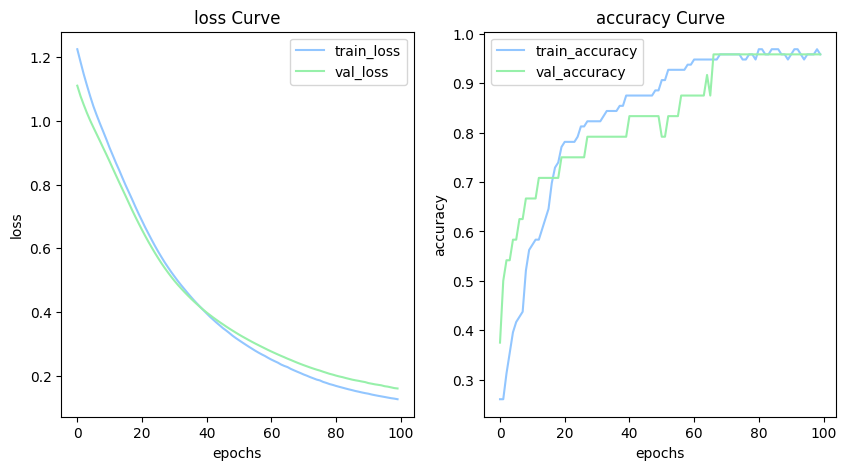

time: 1.31 s (started: 2024-06-28 10:26:38 +00:00)


In [34]:
plot_history(history)

## 모델 검증 test 데이터

In [35]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy : ', accuracy_score(y_true, y_pred))
    print('recall : ', recall_score(y_true, y_pred, average=aver))
    print('precision : ', precision_score(y_true, y_pred, average=aver))
    print('f1 : ', f1_score(y_true, y_pred, average=aver))
    print('-----'*11)
    cfm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize = (3,3))
    s = sns.heatmap(cfm, annot=True, fmt='d', cbar=False, cmap='Purples')
    s.set(xlabel='Predcition', ylabel='Actual')
    plt.show()

time: 311 ms (started: 2024-06-28 10:26:40 +00:00)


In [36]:
y_pred = model.predict(X_test_s)

1/1 [==============================] - 0s 245ms/step
time: 536 ms (started: 2024-06-28 10:26:40 +00:00)


In [37]:
y_pred

array([[1.01348860e-02, 7.51489103e-01, 2.38375977e-01],
       [3.37291598e-01, 6.62089586e-01, 6.18811115e-04],
       [4.79128864e-03, 8.35428715e-01, 1.59780040e-01],
       [2.41894880e-03, 9.58628893e-01, 3.89521681e-02],
       [9.96230423e-01, 3.69250705e-03, 7.70297120e-05],
       [1.77268460e-02, 9.08755541e-01, 7.35176280e-02],
       [7.07298459e-05, 1.10020839e-01, 8.89908493e-01],
       [5.15331049e-04, 6.62849918e-02, 9.33199644e-01],
       [9.94465709e-01, 5.42659033e-03, 1.07643624e-04],
       [2.66663055e-03, 9.89046812e-01, 8.28653574e-03],
       [9.19838858e-05, 1.91501379e-02, 9.80757773e-01],
       [5.59454784e-04, 3.61357093e-01, 6.38083518e-01],
       [9.97704744e-01, 2.26962427e-03, 2.55368905e-05],
       [5.90208911e-05, 2.19553821e-02, 9.77985561e-01],
       [9.90568459e-01, 9.38220788e-03, 4.93703192e-05],
       [4.02922230e-03, 6.77851140e-01, 3.18119675e-01],
       [3.14466379e-05, 7.67785683e-02, 9.23189878e-01],
       [4.86088509e-04, 1.45341

time: 15.9 ms (started: 2024-06-28 10:26:41 +00:00)


In [38]:
y_pred.shape, y_test_o.shape

((30, 3), (30, 3))

time: 4.73 ms (started: 2024-06-28 10:26:41 +00:00)


accuracy :  0.9333333333333333
recall :  0.9246031746031745
precision :  0.9487179487179488
f1 :  0.9320884429580082
-------------------------------------------------------


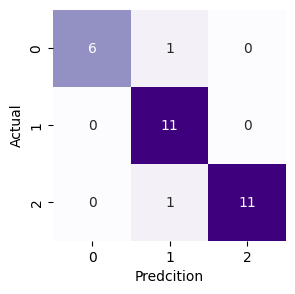

time: 756 ms (started: 2024-06-28 10:27:39 +00:00)


In [40]:
print_metrics(np.argmax(y_test_o,axis=1),np.argmax(y_pred,axis=1),'macro')